In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # plot graphics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [0]:
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [0]:
print(train.info)


<bound method DataFrame.info of           id  gender   age  ...   bmi   smoking_status stroke
0      30669    Male   3.0  ...  18.0              NaN      0
1      30468    Male  58.0  ...  39.2     never smoked      0
2      16523  Female   8.0  ...  17.6              NaN      0
3      56543  Female  70.0  ...  35.9  formerly smoked      0
4      46136    Male  14.0  ...  19.1              NaN      0
...      ...     ...   ...  ...   ...              ...    ...
29996  72228  Female  48.0  ...  34.3     never smoked      0
29997  14747    Male  72.0  ...  34.8              NaN      0
29998  50636  Female  20.0  ...  19.7     never smoked      0
29999  43161  Female  27.0  ...  22.5     never smoked      0
30000  37061    Male  19.0  ...  16.8     never smoked      0

[30001 rows x 12 columns]>
<bound method DataFrame.info of           id  gender   age  ...  avg_glucose_level   bmi   smoking_status
0      37061    Male  19.0  ...              92.61  16.8     never smoked
1      42333    

0    29471
1      530
Name: stroke, dtype: int64

In [0]:
print(test.info)

In [0]:
train['stroke'].value_counts()

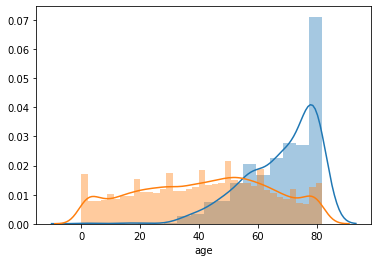

In [0]:
# The destribution of ages between people with and without stroke

sns.distplot(train.loc[train['stroke']==1]['age'])
sns.distplot(train.loc[train['stroke']==0]['age'])


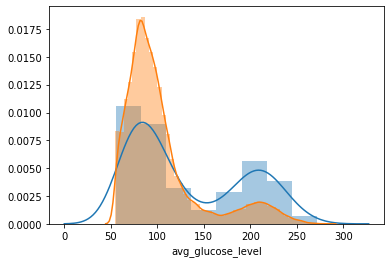

In [0]:
# The destribution of avg_glucose_level between people with and without stroke
sns.distplot(train.loc[train['stroke']==1]['avg_glucose_level'])
sns.distplot(train.loc[train['stroke']==0]['avg_glucose_level'])

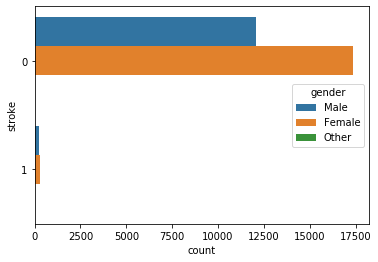

In [0]:
# The distribution of gender and having stroke
sns.countplot(y=train['stroke'], hue=train['gender'])

In [0]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [0]:
# some statistics of train data with stroke=1
train.loc[train['stroke']==1].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,530.000000,530.000000,530.000000,530.000000,530.000000,438.000000,530.0
mean,37537.015094,67.844000,0.254717,0.209434,132.794377,29.937900,1.0
std,20507.492017,12.578173,0.436114,0.407289,61.218296,6.346629,0.0
min,210.000000,1.320000,0.000000,0.000000,55.700000,14.300000,1.0
25%,20846.500000,59.000000,0.000000,0.000000,80.772500,25.700000,1.0
50%,36767.000000,71.000000,0.000000,0.000000,105.855000,29.350000,1.0
75%,55701.000000,78.000000,1.000000,0.000000,197.190000,33.275000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [0]:
# some statistics of train data with stroke=1
train.loc[train['stroke']==0].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29471.000000,29471.000000,29471.000000,29471.000000,29471.000000,28546.000000,29471.0
mean,36359.001323,41.816523,0.091649,0.044926,104.090983,28.642146,0.0
std,21076.661971,22.328541,0.288535,0.207144,42.690452,7.799156,0.0
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.0
25%,17954.500000,24.000000,0.000000,0.000000,77.470000,23.200000,0.0
50%,36505.000000,43.000000,0.000000,0.000000,91.450000,27.800000,0.0
75%,54526.500000,59.000000,0.000000,0.000000,111.760000,33.000000,0.0
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,0.0


In [0]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,37061,Male,19.0,0,0,No,Private,Rural,92.61,16.8,never smoked
1,42333,Male,53.0,0,0,Yes,Govt_job,Urban,94.03,26.5,NaN
2,58964,Female,51.0,0,0,Yes,Private,Rural,127.22,31.0,smokes
3,34063,Female,17.0,0,0,No,Private,Rural,112.15,19.8,NaN
4,43682,Female,41.0,0,0,Yes,Govt_job,Urban,112.17,27.5,never smoked


In [0]:
# Count the empty cells in train data an test data
# And after fill with some methods
for i in train.columns:
    print(i, (pd.isnull(train[i])).sum())

for i in test.columns:
  print(i, (pd.isnull(test[i])).sum())

id 0
gender 0
age 0
hypertension 0
heart_disease 0
ever_married 0
work_type 0
Residence_type 0
avg_glucose_level 0
bmi 1017
smoking_status 9176
stroke 0
id 0
gender 0
age 0
hypertension 0
heart_disease 0
ever_married 0
work_type 0
Residence_type 0
avg_glucose_level 0
bmi 445
smoking_status 4116


FILL NAN cells in BMI with mean value


In [0]:
#fill nan cells with mean value
mean_bmi_train = train['bmi'].mean()
mean_bmi_test = test['bmi'].mean()
train['bmi'] = train['bmi'].fillna(mean_bmi_train)
test['bmi'] = test['bmi'].fillna(mean_bmi_test)
#print(mean_bmi, mean_bmi1)

Fill Nan cells in SMOKING_STATUS


In [0]:
train['smoking_status'] = train['smoking_status'].fillna('nan')
test['smoking_status'] = test['smoking_status'].fillna('nan')

In [0]:
ever_married_dict = {'Yes' : 1, 'No' : 0}
train['ever_married'] = train['ever_married'].replace(ever_married_dict)
test['ever_married'] = test['ever_married'].replace(ever_married_dict)

In [0]:
#train.drop(train.loc[train['gender']=='Other'].index, inplace=True)
#test.drop(test.loc[test['gender']=='Other'].index, inplace=True)


Target Encoding, fill with mean values


In [0]:
(train.groupby(['gender'])['stroke'].agg(['mean'])).to_dict()['mean']

{'Female': 0.01657614844987554, 'Male': 0.019244823386114496, 'Other': 0.0}

In [0]:
gender_dict = (train.groupby(['gender'])['stroke'].agg(['mean'])).to_dict()['mean']

train['gender_enc'] = train['gender'].replace(gender_dict)
test['gender_enc'] = test['gender'].replace(gender_dict)


In [0]:
(train.groupby(['work_type'])['stroke'].agg(['mean'])).to_dict()

{'mean': {'Govt_job': 0.017350157728706624,
  'Never_worked': 0.0,
  'Private': 0.018118466898954706,
  'Self-employed': 0.03209242618741977,
  'children': 0.0004775549188156638}}

In [0]:
work_type_dict = (train.groupby(['work_type'])['stroke'].agg(['mean'])).to_dict()['mean']

In [0]:
train['work_type_enc'] = train['work_type'].replace(work_type_dict)
test['work_type_enc'] = test['work_type'].replace(work_type_dict)

In [0]:
(train.groupby(['smoking_status'])['stroke'].agg(['mean'])).to_dict()

{'mean': {'formerly smoked': 0.027783137179239824,
  'nan': 0.011442894507410636,
  'never smoked': 0.01723982308872642,
  'smokes': 0.01972386587771203}}

In [0]:
smoking_status_dict = (train.groupby(['smoking_status'])['stroke'].agg(['mean'])).to_dict()['mean']

In [0]:
train['smoking_status_enc'] = train['smoking_status'].replace(smoking_status_dict )
test['smoking_status_enc'] = test['smoking_status'].replace(smoking_status_dict )

Replacing categorial labels by numerical


In [0]:
train['Residence_type'] = train['Residence_type'].replace({'Urban':1, 'Rural':0 })
test['Residence_type'] = test['Residence_type'].replace({'Urban':1, 'Rural':0 })

In [0]:
train['gender'] = train['gender'].replace({'Male':1, 'Female':0})
test['gender'] = test['gender'].replace({'Male':1, 'Female':0})

Check the data after feature engineering

In [0]:
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_enc,work_type_enc,smoking_status_enc
0,30669,1,3.0,0,0,0,children,0,95.12,18.0,nan,0,0.019245,0.000478,0.011443
1,30468,1,58.0,1,0,1,Private,1,87.96,39.2,never smoked,0,0.019245,0.018118,0.017240
2,16523,0,8.0,0,0,0,Private,1,110.89,17.6,nan,0,0.016576,0.018118,0.011443
3,56543,0,70.0,0,0,1,Private,0,69.04,35.9,formerly smoked,0,0.016576,0.018118,0.027783
4,46136,1,14.0,0,0,0,Never_worked,0,161.28,19.1,nan,0,0.019245,0.000000,0.011443


In [0]:
# Prepared features
features_list = ['gender_enc', 'age', 'hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level', 'bmi', 'work_type_enc','smoking_status_enc']


In [0]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [0]:
# Consider some models for our problem of classification
models = []
LR_model = models.append(('LR', LogisticRegression(penalty = 'l2', solver='liblinear', multi_class='ovr')))
KNN_model = models.append(('KNN', KNeighborsClassifier(weights='uniform')))
CART_model = models.append(('CART', DecisionTreeClassifier()))

#models.append(('SVM', SVC(gamma='auto')))
SGD_model = models.append(('SGD', linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'l2', random_state=2)))
XGB_model = models.append(('XGBoost', XGBClassifier()))

In [0]:
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='ovr', n_jobs=None, penalty='l2',
                     random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('SGD', SGDClassi

In [0]:
# Obtain the score of models on our prepared features
results=[]
names=[]
for name, model in models:
  kfold = model_selection.KFold(n_splits=5, random_state=0)
  cv_results = model_selection.cross_val_score(model, train[features_list], train['stroke'], cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.982334 (0.001647)
KNN: 0.981934 (0.001810)
CART: 0.963901 (0.001639)
SGD: 0.982301 (0.001705)
XGBoost: 0.982334 (0.001647)


In [0]:
def my_cross_validation_for_roc_auc( clf, X, y ,cv=5):
    X = np.array(X.copy())
    y = np.array(y.copy())
    kf = KFold(n_splits=cv)
    kf.get_n_splits(X)
    scores = []
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        prediction_on_this_fold = clf.predict_proba(X_test)[:,1]
        
        score = roc_auc_score(y_score=prediction_on_this_fold, y_true=y_test)
        scores.append(score)
        
    return scores

In [0]:
# Which features have an impact in each model
# Feature importance
# Than create new list features for each model
features_scores = {}
for name, model in models:
  print(name)
  for f in features_list:
    scores = my_cross_validation_for_roc_auc(model, train[[f]] , train['stroke'])
    print(f,  np.mean(scores))
    features_scores[f] = np.mean(scores)

LR
gender_enc 0.4817542955444707
age 0.8366076869311634
hypertension 0.581615320246325
heart_disease 0.5818777239077606
ever_married 0.6259899654630761
Residence_type 0.47530819779702477
avg_glucose_level 0.6139074419876318
bmi 0.5628027539558931
work_type_enc 0.6158517888360108
smoking_status_enc 0.5854061511636889
KNN
gender_enc 0.5123750205813817
age 0.5508237989437605
hypertension 0.5165726664923618
heart_disease 0.5
ever_married 0.5
Residence_type 0.5
avg_glucose_level 0.505994919417059
bmi 0.5310050891727757
work_type_enc 0.5161008013274642
smoking_status_enc 0.4868470211965851
CART
gender_enc 0.5182457044555294
age 0.8228435455404479
hypertension 0.581615320246325
heart_disease 0.5818777239077606
ever_married 0.6259899654630761
Residence_type 0.49321198951765294
avg_glucose_level 0.49206327961442364
bmi 0.5805058568243966
work_type_enc 0.6068049732633557
smoking_status_enc 0.5854061511636889
SGD
gender_enc 0.5182457044555294
age 0.8366076869311634
hypertension 0.581615320246325


In [0]:
features_for_LR = ['age', 'hypertension','heart_disease','ever_married','avg_glucose_level', 'bmi', 'work_type_enc','smoking_status_enc']
features_for_KNN = ['age', 'hypertension','heart_disease','ever_married','avg_glucose_level', 'bmi', 'work_type_enc']
features_for_CART = ['age', 'hypertension','heart_disease','ever_married', 'bmi', 'work_type_enc','smoking_status_enc']
features_for_SGD = ['age', 'hypertension','heart_disease','ever_married','avg_glucose_level', 'bmi']
features_for_XGB = ['age', 'hypertension','heart_disease','ever_married','avg_glucose_level', 'bmi', 'work_type_enc','smoking_status_enc']

In [0]:
features_full = [features_for_LR, features_for_KNN, features_for_CART, features_for_SGD, features_for_XGB]

In [0]:
# Try to obtain diff results on diff features in each model
results=[]
names=[]

for name, model in models:
  for f in features_full:
    kfold = model_selection.KFold(n_splits=5, random_state=0)
    cv_results = model_selection.cross_val_score(model, train[features_list], train['stroke'], cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.982334 (0.001647)
LR: 0.982334 (0.001647)
LR: 0.982334 (0.001647)
LR: 0.982334 (0.001647)
LR: 0.982334 (0.001647)
KNN: 0.981934 (0.001810)
KNN: 0.981934 (0.001810)
KNN: 0.981934 (0.001810)
KNN: 0.981934 (0.001810)
KNN: 0.981934 (0.001810)
CART: 0.963168 (0.001690)
CART: 0.962801 (0.001507)
CART: 0.963701 (0.001925)
CART: 0.963701 (0.001807)
CART: 0.963501 (0.001445)
SGD: 0.982301 (0.001705)
SGD: 0.982301 (0.001705)
SGD: 0.982301 (0.001705)
SGD: 0.982301 (0.001705)
SGD: 0.982301 (0.001705)
XGBoost: 0.982334 (0.001647)
XGBoost: 0.982334 (0.001647)
XGBoost: 0.982334 (0.001647)
XGBoost: 0.982334 (0.001647)
XGBoost: 0.982334 (0.001647)


In [0]:
# Use three models
# LogRegression; SGDClass; XGBClas
lr = LogisticRegression(penalty = 'l2', solver='liblinear', multi_class='ovr')
sgd = linear_model.SGDClassifier(max_iter=1000,  loss='log', penalty = 'l2', random_state=2)
xgb = XGBClassifier()
# Fitting our selected models
lr.fit(train[features_for_LR], train['stroke'])
sgd.fit(train[features_for_SGD], train['stroke'])
xgb.fit(train[features_for_XGB], train['stroke'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# Predictions
prediction_LR = lr.predict_proba(test[features_for_LR])[:,1]
prediction_SGD = sgd.predict_proba(test[features_for_SGD])[:,1]
prediction_XGB = xgb.predict_proba(test[features_for_XGB])[:,1]

In [0]:
#print(prediction_XGB)

[0.0002123  0.00976355 0.01235282 ... 0.04960624 0.00386733 0.06876039]


In [0]:
# Write into csv files
sample['stroke'] = prediction_LR
sample.to_csv('submit_LR.csv', index=None)
sample['stroke'] = prediction_SGD
sample.to_csv('submit_SGD.csv', index=None)
sample['stroke'] = prediction_XGB
sample.to_csv('submit_XGB.csv', index=None)

The results obtained from Kaggle\
SGD_SCORE = 0.85530\
XGB_SCORE = 0.85657\
LR_SCORE = 0.86559

In [0]:
# Ther results obtained from Kaggle
#SGD_SCORE = 0.85530
#XGB_SCORE = 0.85657
#LR_SCORE = 0.86559


In [221]:
#from xgboost import XGBRegressor
#mll = XGBRegressor(max_depth = 10, learning_rate=0.01)
#ft_list = ['age', 'hypertension','heart_disease','ever_married','avg_glucose_level', 'bmi', 'smoking_status_enc']
#mll.fit(train[ft_list], train['stroke'])

#sample['stroke'] = mll.predict(test[ft_list])
#sample.to_csv('submit_reg.csv', index=None)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:49:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
